### Import the libraries 

In [1]:
from phievo.Networks import mutation,deriv2
import random

Execute mutation.py
execute initialization_code.py
Execute classes_eds2.py
Execute deriv2
Execute interaction.py
Execute CorePromoter (Interaction Template)
Execute TFHill (Interaction Template)
Execute PPI (Interaction Template)
Execute LR (Interaction Template)
Execute Phosphorylation (Interaction Template)
Execute Degradation (Interaction Template)


### Create an empty network

In [2]:
g = random.Random(20160225) # This define a new random number generator
L = mutation.Mutable_Network(g) # Create an empty network

### Create a new  species _S0_
_S0_ is a reference to access quickly to the newly created species latter in the code. Note that one can add attributes to a species by adding elements to a parameter array that is passed to the new\_species method.
<font color='red'>**ATTENTION** : This way of creating a species is not recommanded as it does not handle the interaction between the network's different species (see next section). It is here as to get a feeling on how the intern code works.</font>    

In [3]:
parameters=[['Degradable',0.5]] ## The species is degradable with a rate 0.5
parameters.append(['Input',0]) ## The species cannot serve as an input for the evolution algorithm
parameters.append(['Complexable']) ## The species can be involved in a complex
parameters.append(['Kinase']) ## The specise can phosphorilate another species. 
parameters.append(['TF',1]) ## 1 for activator 0 for repressor
S0 = L.new_Species(parameters)

### Adding a gene  
A species itself is of no use for the evolution algorithm. The architecture of a networks associates a *TModule* and a *CorePromoter* to a a species to build an cluster representing a gene for the program. The TModule is there so that other transcription factors can bind to it and regulate *S0*.

In [4]:
L = mutation.Mutable_Network(g) ## Clear the network

## Gene 0
parameters=[['Degradable',0.5]]
parameters.append(['TF',1])
parameters.append(['Complexable'])
TM0,prom0,S0 = L.new_gene(0.5,5,parameters) ## Adding a new gene creates a TModule, a CorePromoter and a species

# Gene 1
parameters=[['Degradable',0.5]]
parameters.append(['TF',0])
parameters.append(['Complexable'])
TM1,prom1,S1 = L.new_gene(0.5,5,parameters)

# Gene 2
parameters=[['Degradable',0.5]]
parameters.append(['TF',1])
parameters.append(['Phosphorylable'])
TM2,prom2,S2 = L.new_gene(0.5,5,parameters)

# Gene 3
parameters=[['Degradable',0.5]]
parameters.append(['TF',0])
TM3,prom3,S3 = L.new_gene(0.5,5,parameters)

 ### Add complexation between S0 and S1.
 It creates a *ppi* interaction and a new species *S4* corresponding to the complex.

In [5]:
parameters.append(['Kinase'])
ppi,S4 = L.new_PPI(S0 , S1 , 2.0 , 1.0 , parameters)

### Add a phosphorylation of S2 by S4
This creates the phosphorylated version of *S2*, *S5*, and a a phosphorylation, *phospho* .

In [6]:
S5,phospho = L.new_Phosphorylation(S4,S2,2.0,0.5,1.0,3) 

### Regulate the production of S1 by S3 and S5
 Note that since the parameter *L.fixed_activity_for_TF* is True, the activity setting in *new_TFHill*  is not taken into account. Only the TF activity counts.

In [7]:
S5.change_type("TF",[1]) # Note this is already the default value for a phosphorilated species
tfhill1 = L.new_TFHill( S3, 1, 0.5, TM1,activity=1)
tfhill2 = L.new_TFHill( S5, 1, 0.5, TM1,activity=1)

Activity settings: True
Activity settings: True


### Add a regulation of The production of S0 by S5 and S3

Execute palette.py


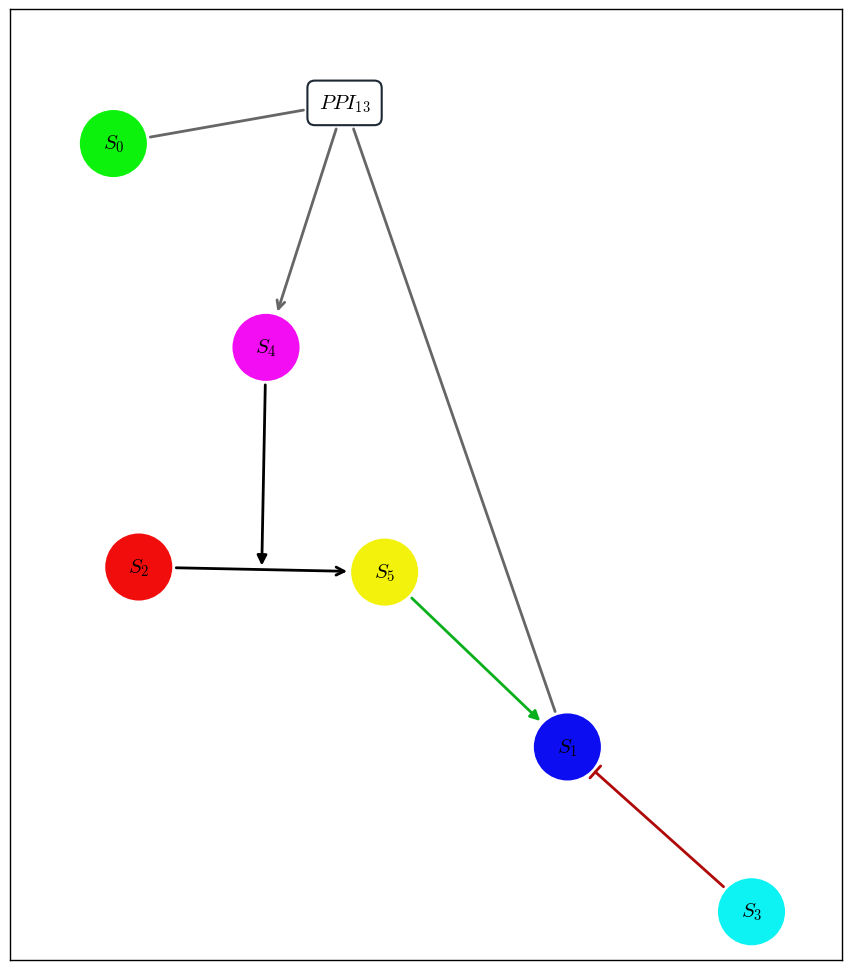

In [8]:
L.draw()